#Stock Market Using LSTM

##Steps

*   Collect the Stock Data-- AAPL
*   Preprocess the Data- Train and Test
*   Apply Min-Max Scaling to Avoid Data Lekage
*   Create an Stacked LSTM Model

*   Predict the test data and Plot the OutPut
*   Predict the future 30 days and Plot the OutPut







In [ ]:
import pandas_datareader as pdr

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key='API_KEY_FROM_TINGO')

/usr/local/lib/python3.10/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('AAPL.csv')

In [ ]:
df2 = df.reset_index()['close']

In [ ]:
df2[1228:]

,close
1228,230.57
1229,231.41
1230,233.40
1231,233.67
1232,230.10
1233,225.91
1234,222.91
1235,222.01
1236,223.45
1237,222.72


In [ ]:
# Getting only close
df1 = df.reset_index()['close']

In [ ]:
df1.shape

(1256,)

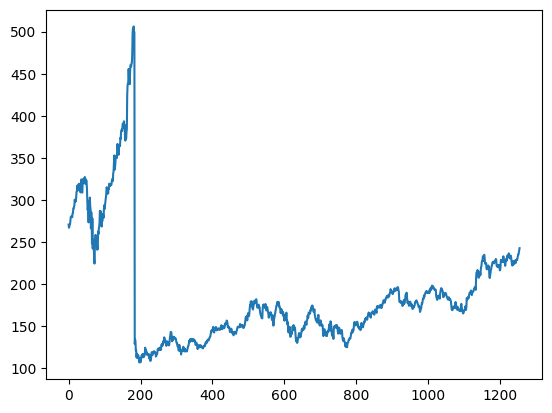

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

LSTM are sensitive to the scale of the data, so we apply MinMax Scaler

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# Split data first
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size], df1[training_size:len(df1)]

# Create scaler and fit ONLY on training data
scaler = MinMaxScaler(feature_range=(0,1))
train_data_scaled = scaler.fit_transform(train_data.reshape(-1,1))
test_data_scaled = scaler.transform(test_data.reshape(-1,1))

In [ ]:
import numpy

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
#reshpe input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
import tensorflow
#Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step - loss: 0.0317 - val_loss: 0.0107
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - loss: 0.0189 - val_loss: 0.0030
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - loss: 0.0138 - val_loss: 0.0021
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - loss: 0.0099 - val_loss: 3.3712e-04
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 0.0082 - val_loss: 3.0929e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - loss: 0.0106 - val_loss: 5.6086e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - loss: 0.0067 - val_loss: 7.8259e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - loss: 0.0054 - val_loss: 9.1059e-04
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - loss: 0.0041 - val_loss: 3.9170e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - loss: 0.0038 - val_loss: 5.3926e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - loss: 0.0096 - val_loss: 0.0026
Epoch 12/100


In [ ]:
import tensorflow as tf

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.02973769664746818

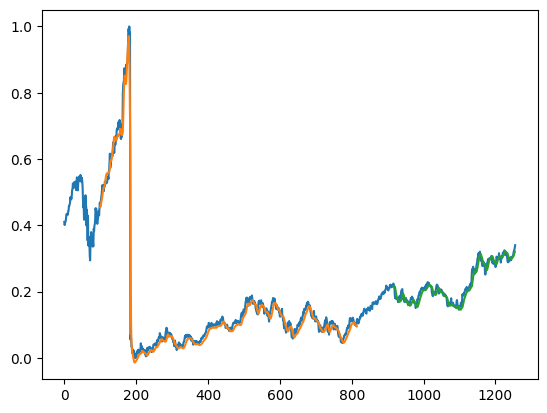

In [ ]:
#PLOTING
# SHIFT Train Prediction for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# Shift test Prediction for plotting
test_predictPlot = numpy.empty_like(df1)
test_predictPlot[:, :] = numpy.nan
test_predictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(test_predictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

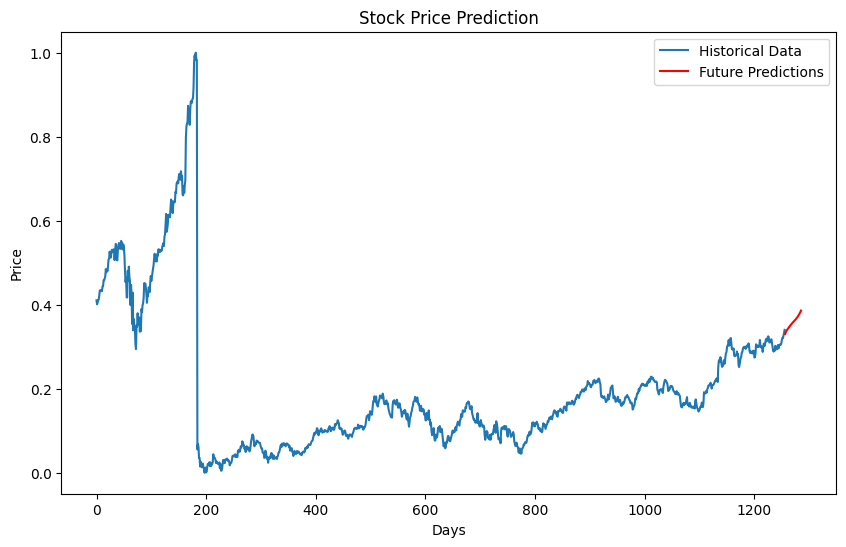

Predicted Values for Next 30 Days:
Day 1: 0.33
Day 2: 0.33
Day 3: 0.34
Day 4: 0.34
Day 5: 0.34
Day 6: 0.34
Day 7: 0.34
Day 8: 0.35
Day 9: 0.35
Day 10: 0.35
Day 11: 0.35
Day 12: 0.35
Day 13: 0.35
Day 14: 0.36
Day 15: 0.36
Day 16: 0.36
Day 17: 0.36
Day 18: 0.36
Day 19: 0.36
Day 20: 0.36
Day 21: 0.37
Day 22: 0.37
Day 23: 0.37
Day 24: 0.37
Day 25: 0.37
Day 26: 0.38
Day 27: 0.38
Day 28: 0.38
Day 29: 0.38
Day 30: 0.39


In [ ]:
import numpy as np

# Assuming you've already trained your model and have the scaled test data
# Use the last 100 data points from the test data as the initial input
x_input = test_data_scaled[-100:].reshape(1, -1, 1)

# List to store predictions
lst_output = []

# Predict next 30 days
for i in range(30):
    # Predict the next day
    yhat = model.predict(x_input, verbose=0)

    # Add prediction to output list
    lst_output.append(yhat[0][0])

    # Slide the window: remove the oldest point and add the new prediction
    x_input = np.roll(x_input, -1)
    x_input[0, -1, 0] = yhat[0][0]

# Convert predictions back to original scale
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

# Plotting
import matplotlib.pyplot as plt

# Plot original data up to the last known point
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df1), label='Historical Data')

# Create x-axis for predictions
last_known_day = len(scaler.inverse_transform(df1))
prediction_days = range(last_known_day, last_known_day + 30)

# Plot predictions
plt.plot(prediction_days, lst_output, color='red', label='Future Predictions')

plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print the predicted values
print("Predicted Values for Next 30 Days:")
for i, pred in enumerate(lst_output, 1):
    print(f"Day {i}: {pred[0]:.2f}")

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
len(df1)

1256

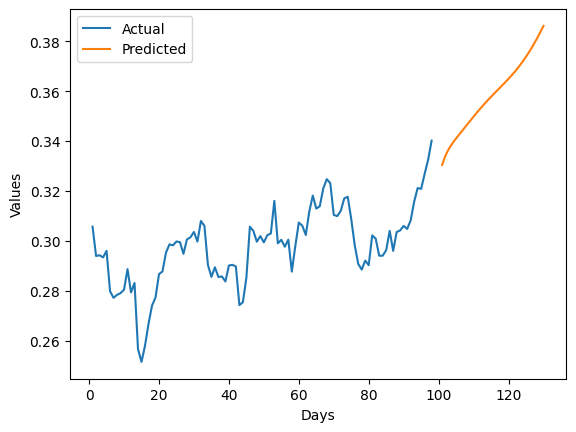

In [ ]:
import matplotlib.pyplot as plt

# Ensure day_new and df1[1158:] have the same length
day_new = day_new[:len(df1[1158:])]
plt.plot(day_new, scaler.inverse_transform(df1[1158:]).reshape(-1), label="Actual")

# Ensure day_pred and lst_output have the same length
day_pred = day_pred[:len(lst_output)]
plt.plot(day_pred, scaler.inverse_transform(lst_output).reshape(-1), label="Predicted")

# Add labels and legend
plt.xlabel("Days")
plt.ylabel("Values")
plt.legend()
plt.show()


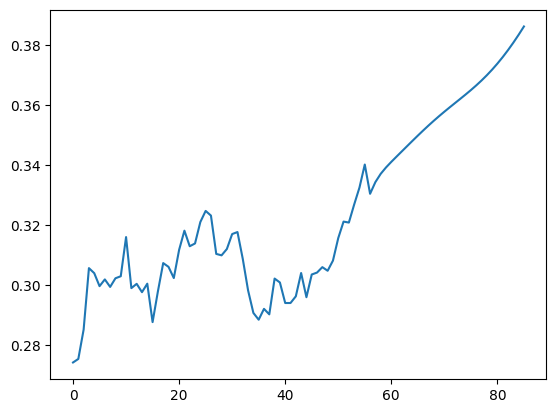

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

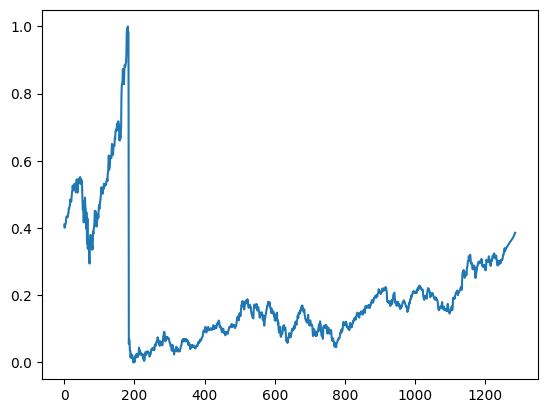

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
